In [188]:
# importing the dependencies
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

# The Gambler's Ruin

This is going to explore the concept of a random walk. A random walk can be mathematically represented by the following equation (for our case of +1 and -1 moves when starting with n money):
$$ u_n = p u_{n+1} + q u_{n-1} $$

where $ u_{n} $ is the probability of losing all your money, $p$ is your probability of winning the round, $q = 1 - p$. Also $p$ is independent in this scenario.

Now we will get a list of random integers between $1$ and $100$. For numbers between $1$ and $50$ (inclusive), we will count those as a 'Tails'. For numbers between $51$ and $100$ (inclusive), we will count those as a 'Heads'

In [189]:
N = 100 # number of steps that we want
rand = np.random.randint(1,100,N)
rand_prob = []

for i in rand:
    if i <= 50:
        rand_prob.append(-1)
    else:
        rand_prob.append(1)

In [190]:
# initialising the starting point for our walk
start = 0
walk = []

for j in rand_prob:
    walk.append(start)
    start += j

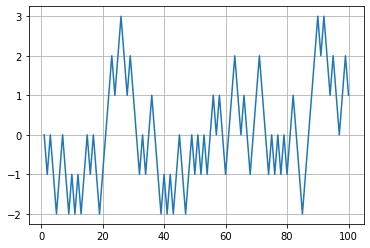

In [192]:
# now we will plot the graph

# creation of x-axis data
x = np.linspace(1,N,N)

plt.plot(x,walk)
plt.grid()
plt.show()

Now we are going to wrap the above in a function that will plot out multiple walks on a graph

In [183]:
def random_walk(p, start_position, number_steps, number_of_walks=1): # p is the probability of getting a heads
     
    x = np.linspace(1,number_steps,number_steps)
    
    #starting to loop through the number of walks
    for k in range(number_of_walks):
        walk = [] # creating a list for the walk values
        
        rand = np.random.randint(1,100,number_steps)  # random generated points
        rand_prob = []

        for i in rand: # mapping them to probability outcomes
            if i <= 100 * p:
                rand_prob.append(+1)
            else:
                rand_prob.append(-1)

        # walk plotting
        start = start_position

        for j in rand_prob:
            walk.append(start)
            start += j
        
        plt.plot(x,walk)

    #walk_array = np.array(walk).reshape(number_of_walks,number_steps)
    #return walk_array    
    plt.grid()
    plt.show()

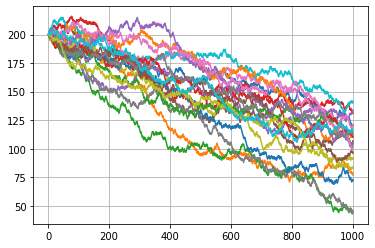

In [195]:
# play around and fiddle with the parameters to see how events turn out
# arguments: (probability_winning_round, starting_cash (position), number_rounds_played, number_walks (experiments))
random_walk(.44,200,1000,20)

Other than helping to show a visualisation of a random walk process. I hope you can see that it **only takes a slight advantage for a casino to win in the long run**!

# Implementing Monte Carlo Simulations on Cartesian Grid

We will slightly change the wording of the problem. Now we want to know: 

**"Let us say you are watching a frog hop either North, East, West, or South from his home at the origin. What is the minimum number of maximum number of hops he should take if he wants to end within 5 hops from his house?"**

We could calculate this mathematically, but instead we can use Monte Carlo simulations to solve this problem

In [166]:
def random_walk_monte_carlo(start_position_x, start_position_y, number_steps): 
     
    '''Return the co-ordinates of the walk after it takes a given number of steps'''
    
    x,y = start_position_x,start_position_y
    
    #starting to loop through the number of steps
    for k in range(number_steps):
        (dx,dy) = random.choice([(0,1),(1,0),(0,-1),(-1,0)])
        x += dx
        y += dy
    return (x,y)        

In [185]:
number_walks = 20000
start_x = 0
start_y = 0

In [169]:
# let us first guess that the answer might be between 1 and 100 and iterate the step number through those
for w in range(1,40):   # for each iteration of the we will want to use the random_walk function defined above

    walks_counter = 0 # this will count the walks that end within 5 spots of his house
    
    for l in range(number_walks):
        (x,y) = random_walk_monte_carlo(start_x,start_y,w) 
        if abs(x-start_x) + abs(y-start_y) <= 5:
            walks_counter += 1
            
    proportion = float(walks_counter)/number_walks
    
    print("Number of Steps: {} , Proportion: {}".format(w,proportion))

Number of Steps: 1 , Proportion: 1.0
Number of Steps: 2 , Proportion: 1.0
Number of Steps: 3 , Proportion: 1.0
Number of Steps: 4 , Proportion: 1.0
Number of Steps: 5 , Proportion: 1.0
Number of Steps: 6 , Proportion: 0.94015
Number of Steps: 7 , Proportion: 0.9691
Number of Steps: 8 , Proportion: 0.86325
Number of Steps: 9 , Proportion: 0.9221
Number of Steps: 10 , Proportion: 0.791
Number of Steps: 11 , Proportion: 0.8722
Number of Steps: 12 , Proportion: 0.73045
Number of Steps: 13 , Proportion: 0.82205
Number of Steps: 14 , Proportion: 0.6737
Number of Steps: 15 , Proportion: 0.7768
Number of Steps: 16 , Proportion: 0.62985
Number of Steps: 17 , Proportion: 0.7329
Number of Steps: 18 , Proportion: 0.5875
Number of Steps: 19 , Proportion: 0.6989
Number of Steps: 20 , Proportion: 0.5418
Number of Steps: 21 , Proportion: 0.661
Number of Steps: 22 , Proportion: 0.5125
Number of Steps: 23 , Proportion: 0.62775
Number of Steps: 24 , Proportion: 0.47945
Number of Steps: 25 , Proportion: 0

Hence, we can see that the longest walk that we can take is to, on average, end up within 5 blocks of home is around **31 steps**

# Monte Carlo in 3-Dimensions

we will implement the above problem, but will add in a z-axis as well

In [174]:
def random_walk_monte_carlo_3D(start_position_x, start_position_y,start_position_z, number_steps): 
     
    '''Return the co-ordinates of the walk after it takes a given number of steps'''
    
    x,y,z = start_position_x,start_position_y,start_position_z
    
    #starting to loop through the number of steps
    for k in range(number_steps):
        (dx,dy,dz) = random.choice([(0,1,0),(1,0,0),(0,-1,0),(-1,0,0),(0,0,1),(0,0,-1)])
        x += dx
        y += dy
        z += dz
        
    return (x,y,z)   

In [175]:
number_walks_3D = 20000
start_x_3D = 0
start_y_3D = 0
start_z_3D = 0

In [187]:
# let us first guess that the answer might be between 1 and 100 and iterate the step number through those
for w in range(1,100):   # for each iteration of the we will want to use the random_walk function defined above

    walks_counter = 0 # this will count the walks that end within 5 spots of his house
    
    for l in range(number_walks):
        (x,y,z) = random_walk_monte_carlo_3D(start_x_3D,start_y_3D,start_z_3D,w) 
        if abs(x-start_x_3D) + abs(y-start_y_3D) <= 5 + abs(z-start_z_3D):
            walks_counter += 1
            
    proportion = float(walks_counter)/number_walks
    
    print("Number of Steps: {} , Proportion: {}".format(w,proportion))

Number of Steps: 1 , Proportion: 1.0
Number of Steps: 2 , Proportion: 1.0
Number of Steps: 3 , Proportion: 1.0
Number of Steps: 4 , Proportion: 1.0
Number of Steps: 5 , Proportion: 1.0
Number of Steps: 6 , Proportion: 0.9951
Number of Steps: 7 , Proportion: 0.99835
Number of Steps: 8 , Proportion: 0.98165
Number of Steps: 9 , Proportion: 0.9928
Number of Steps: 10 , Proportion: 0.963
Number of Steps: 11 , Proportion: 0.98395
Number of Steps: 12 , Proportion: 0.94625
Number of Steps: 13 , Proportion: 0.9698
Number of Steps: 14 , Proportion: 0.92385
Number of Steps: 15 , Proportion: 0.9594
Number of Steps: 16 , Proportion: 0.90325
Number of Steps: 17 , Proportion: 0.9452
Number of Steps: 18 , Proportion: 0.8788
Number of Steps: 19 , Proportion: 0.9314
Number of Steps: 20 , Proportion: 0.8647
Number of Steps: 21 , Proportion: 0.91735
Number of Steps: 22 , Proportion: 0.844
Number of Steps: 23 , Proportion: 0.90425
Number of Steps: 24 , Proportion: 0.82525
Number of Steps: 25 , Proportion:

We can see from this, that even up until 99 steps, we still would finish within 5 hops of our house around 55+% of the time